# Analysis of the Student Perfomance on the exam

In [158]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [83]:
#import dataset
students = pd.read_csv('StudentsPerformance.csv')

## Code book

In [84]:
students.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [85]:
students.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [86]:
students.shape

(1000, 8)

Dataset consists of 8 columns and 1000 rows of students test results. This data set includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.

In [87]:
print ("Rows     : " ,students.shape[0])
print ("Columns  : " ,students.shape[1])
print ("\nColumns : \n" ,students.columns.tolist())
print ("\nMissing values :  ", students.isnull().sum().values.sum())
print ("\nUnique values :  \n",students.nunique())

Rows     :  1000
Columns  :  8

Columns : 
 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

Missing values :   0

Unique values :  
 gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64


In [88]:
students.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Now I will create new colimns that will be needed further for analysis

In [89]:
#creating new columns 
students['total score']= students['math score']+students['writing score']+students['reading score']
students['percentage']=students['total score']/300

In [90]:
#creating a new columns pass/fail result of each student
def result(x):
    if x >=0.5:
        return "Pass"
    else:
        return "Fail"
    
students['result']=students['percentage'].apply(result)

In [91]:
students.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total score  percentage result  
0          218    0.726667   Pass  
1          247    0.823333   Pass  
2          278    0.926667   Pass  
3          148    0.493333   Fail  
4          229    0.763333   Pass

In [260]:
students.describe()

math score  reading score  writing score  total score   percentage
count  1000.00000    1000.000000    1000.000000  1000.000000  1000.000000
mean     66.08900      69.169000      68.054000   203.312000     0.677707
std      15.16308      14.600192      15.195657    42.771978     0.142573
min       0.00000      17.000000      10.000000    27.000000     0.090000
25%      57.00000      59.000000      57.750000   175.000000     0.583333
50%      66.00000      70.000000      69.000000   205.000000     0.683333
75%      77.00000      79.000000      79.000000   233.000000     0.776667
max     100.00000     100.000000     100.000000   300.000000     1.000000

## Exloratory Analysis

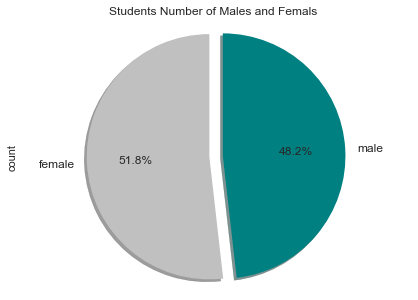

In [92]:
#Gender split
plt.figure(figsize = [7, 5])
colors=( 'silver', 'teal')
plt.pie(students['gender'].value_counts()/students.shape[0],labels=('female','male'),
        explode = [0.03,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 90, textprops={'fontsize': 12},colors=colors);
plt.title('Students Number of Males and Femals  ', fontsize=12 );
plt.axis('equal');
plt.ylabel('count')

plt.show()

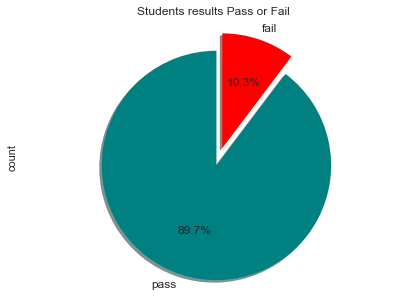

In [93]:
#Result split

plt.figure(figsize = [7, 5])
colors=( 'teal', 'red')
plt.pie(students['result'].value_counts()/students.shape[0],labels=('pass','fail'),
        explode = [0.08,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 90, textprops={'fontsize': 12},colors=colors);
plt.title('Students results Pass or Fail', fontsize=12 );
plt.axis('equal');
plt.ylabel('count')

plt.show()

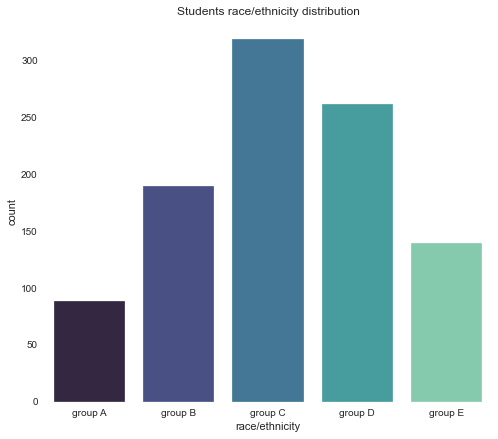

In [258]:
# Race/ethnicity split
plt.figure(figsize = [8,7])
sns.set_style("white")
sns.countplot(students['race/ethnicity'], palette='mako', order=['group A', 'group B', 'group C', 'group D', 'group E']);
plt.title('Students race/ethnicity distribution', fontsize=12 );

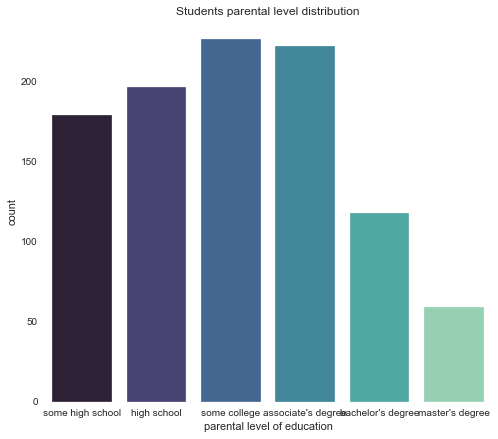

In [256]:
# Parental education split
plt.figure(figsize = [8, 7])
sns.set_style("white")
sns.countplot(students['parental level of education'], 
              palette='mako', order=['some high school','high school','some college',"associate's degree", "bachelor's degree", "master's degree"]);
plt.title('Students parental level distribution', fontsize=12 );

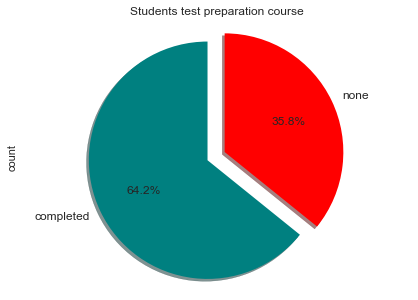

In [120]:
# Test preparation 
plt.figure(figsize = [7, 5])
colors=( 'teal', 'red')
plt.pie(students['test preparation course'].value_counts()/students.shape[0], labels = ('completed','none'),
        explode = [0.08,0.08],autopct ='%1.1f%%',
        shadow = True,startangle = 90, textprops={'fontsize': 12},colors=colors);
plt.title('Students test preparation course', fontsize=12 );
plt.axis('equal');
plt.ylabel('count')

plt.show()

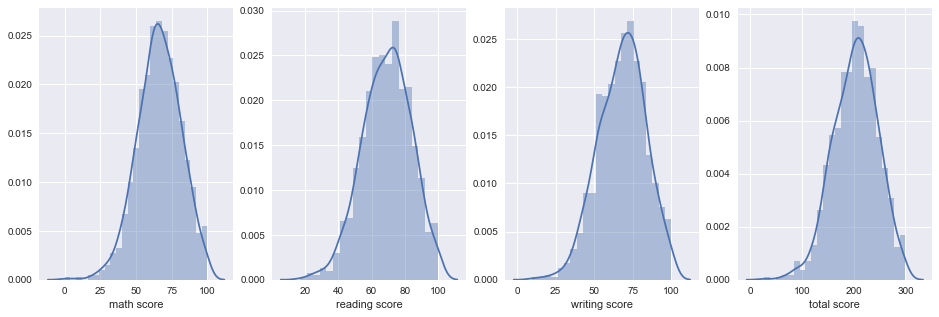

In [97]:
# Checking if numeric data is normally distributed
plt.figure(figsize = (16,5))

plt.subplot(1, 4, 1)
sns.distplot(students['math score'])

plt.subplot(1, 4, 2)
sns.distplot(students['reading score'])

plt.subplot(1, 4, 3)
sns.distplot(students['writing score'])

plt.subplot(1, 4, 4)
sns.distplot(students['total score'])

plt.show()

In [98]:
print("Average math score is    : {}".format(np.mean(students['math score'])))
print("Average reading score is : {}".format(np.mean(students['reading score'])))
print("Average writing score is : {}".format(np.mean(students['writing score'])))
print("Average total score is   : {}".format(np.mean(students['total score'])))

Average math score is    : 66.089
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 203.312


In [259]:
print("Median math score is    : {}".format(np.median(students['math score'])))
print("Median reading score is : {}".format(np.median(students['reading score'])))
print("Median writing score is : {}".format(np.median(students['writing score'])))
print("Median total score is   : {}".format(np.median(students['total score'])))

Median math score is    : 66.0
Median reading score is : 70.0
Median writing score is : 69.0
Median total score is   : 205.0


## Inferetial analysis

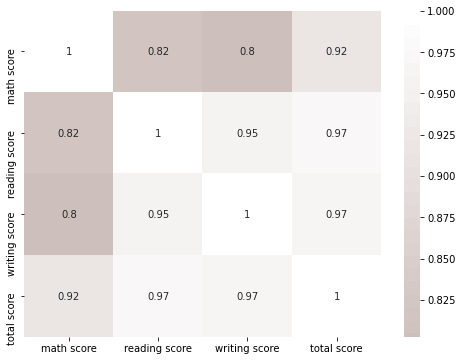

In [70]:
# corr plot of numeric variables
plt.figure(figsize = [8, 6])
sns.heatmap(students[[ 'math score', 'reading score', 'writing score', 'total score']].corr(), annot = True,
           cmap = 'terrain', center = 0)
plt.show()

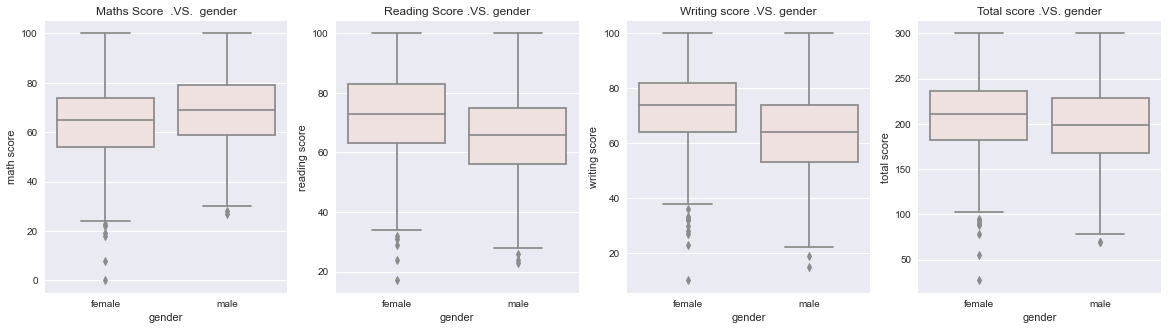

In [74]:
# relation between gender and exam scores
plt.style.use('seaborn')
plt.figure(figsize=(20,5))
default_color = sns.color_palette('vlag',)[3]

   #plot for maths score
plt.subplot(1, 4, 1);
sns.boxplot(data=students,x='gender', y='math score',color=default_color)
plt.title("Maths Score  .VS.  gender");

    #plot for reading score
plt.subplot(1, 4, 2);
sns.boxplot(data=students,x='gender', y='reading score',color=default_color)
plt.title("Reading Score .VS. gender");
    
    #plot for writing score
plt.subplot(1, 4, 3);
sns.boxplot(data=students,x='gender', y='writing score',color=default_color)
plt.title("Writing score .VS. gender");

    #plot for total score
plt.subplot(1, 4, 4);
sns.boxplot(data=students,x='gender', y='total score',color=default_color)
plt.title("Total score .VS. gender");
    
plt.show();

In [191]:
stats.ttest_ind(students[students['gender']=='male']['math score'], students[students['gender']=='female']['math score'])

Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)

In [193]:
# gender vs math, reading, writing scores - several t-test
stats.ttest_ind(students[students['gender']=='male']['reading score'], students[students['gender']=='female']['reading score'])

Ttest_indResult(statistic=-7.959308005187657, pvalue=4.680538743933289e-15)

In [194]:
# gender vs math, reading, writing scores - several t-test
stats.ttest_ind(students[students['gender']=='male']['writing score'], students[students['gender']=='female']['writing score'])

Ttest_indResult(statistic=-9.979557910004507, pvalue=2.019877706867934e-22)

In [190]:
# gender vs math, reading, writing scores - several t-test
stats.ttest_ind(students[students['gender']=='male']['total score'], students[students['gender']=='female']['total score'])

Ttest_indResult(statistic=-4.169913529142, pvalue=3.311973638243664e-05)

#### Math, writing and reading scores Correlation and Regression

<AxesSubplot:xlabel='math score', ylabel='writing score'>

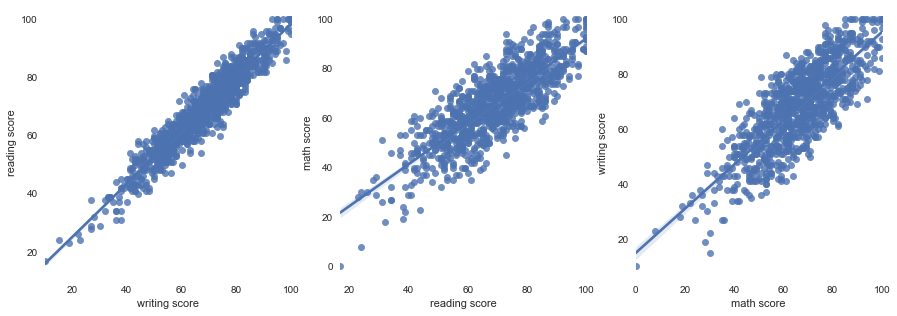

In [299]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1);
sns.regplot("writing score", "reading score", data=students)
plt.subplot(1, 3, 2);
sns.regplot("reading score", "math score", data=students)
plt.subplot(1, 3, 3);
sns.regplot("math score", "writing score", data=students)

In [307]:
df = students[[ 'total score','math score', 'reading score', 'writing score']]
df.columns = ['total', 'math','read','write']
df

total  math  read  write
0      218    72    72     74
1      247    69    90     88
2      278    90    95     93
3      148    47    57     44
4      229    76    78     75
..     ...   ...   ...    ...
995    282    88    99     95
996    172    62    55     55
997    195    59    71     65
998    223    68    78     77
999    249    77    86     86

[1000 rows x 4 columns]

In [309]:
result = sm.ols(formula="total~math+read+write", data=df).fit()
print(result.params)
print(result.summary())

Intercept    2.842171e-14
math         1.000000e+00
read         1.000000e+00
write        1.000000e+00
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.575e+31
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:25:31   Log-Likelihood:                 28250.
No. Observations:                1000   AIC:                        -5.649e+04
Df Residuals:                     996   BIC:                        -5.647e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

In [310]:
result = sm.ols(formula="math~read+write", data=df).fit()
print(result.params)
print(result.summary())

Intercept    7.524092
read         0.601290
write        0.249424
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          2.25e-243
Time:                        13:27:23   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

#### Impact of gender on the Outcome

In [149]:
#impact of gender on outcome
students.groupby(['gender']).mean()

math score  reading score  writing score  total score  percentage
gender                                                                   
female   63.633205      72.608108      72.467181   208.708494    0.695695
male     68.728216      65.473029      63.311203   197.512448    0.658375

In [156]:
#contigency table
gender_result = pd.crosstab(index=students['gender'], columns=students['result'])
gender_result

result  Fail  Pass
gender            
female    39   479
male      64   418

In [159]:
stats.chi2_contingency(gender_result)

(8.320394166970535,
 0.0039202412221877045,
 1,
 array([[ 53.354, 464.646],
        [ 49.646, 432.354]]))

P-value is less than 0.05, hence H0 is rejected --> there are relationships between gender and the result

In [290]:
# impact of prepation class on result - chi2
class_result = pd.crosstab(index=students['test preparation course'], columns=students['result'])
class_result

result                   Fail  Pass
test preparation course            
completed                  18   340
none                       85   557

In [291]:
stats.chi2_contingency(class_result)

(15.898629972558705,
 6.682707403110255e-05,
 1,
 array([[ 36.874, 321.126],
        [ 66.126, 575.874]]))

P-value is less than 0.05, hence H0 is rejected --> there are relationships between attendace pf the preparatory class and the result

In [145]:
# parental degree impact on result 
students.groupby(students['parental level of education'])[['total score']].mean()

total score
parental level of education             
associate's degree            208.707207
bachelor's degree             215.771186
high school                   189.290816
master's degree               220.796610
some college                  205.429204
some high school              195.324022

Text(0.5, 1.0, 'Total score .VS. parental level of education')

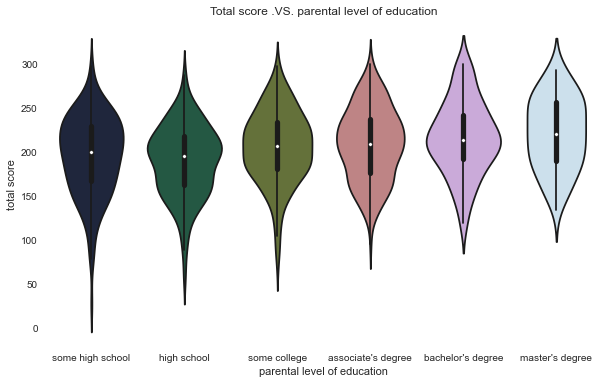

In [298]:
plt.figure(figsize = [10, 6])
sns.violinplot(data=students,x='parental level of education', y='total score',palette='cubehelix', order=['some high school','high school','some college',"associate's degree", "bachelor's degree", "master's degree"] )
plt.title("Total score .VS. parental level of education")

In [198]:
# parental degree impact on result - anova

import scipy.stats as stats

stats.f_oneway(students['total score'][students['parental level of education'] == "associate's degree"],
               students['total score'][students['parental level of education'] == "bachelor's degree"],
               students['total score'][students['parental level of education'] == 'high school'],
               students['total score'][students['parental level of education'] == "master's degree"],
               students['total score'][students['parental level of education'] == 'some college'],
               students['total score'][students['parental level of education'] == 'some high school'])

F_onewayResult(statistic=10.753146962336567, pvalue=4.3810464809431664e-10)

In [ ]:
#P-value is below 0.05, so the H0 can be rejected

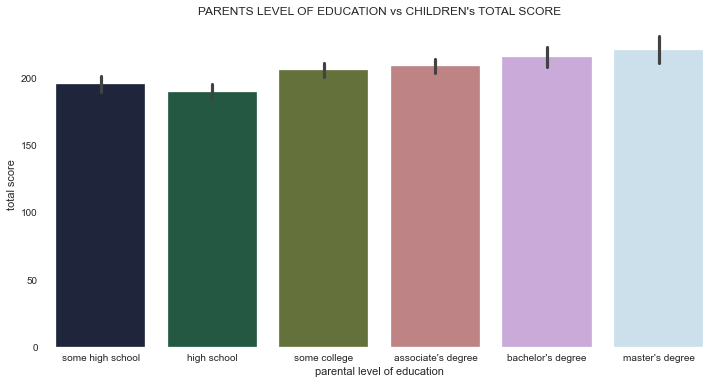

In [175]:
# parental degree impact on result - anova
plt.figure(figsize=(12,6))
plt.title('PARENTS LEVEL OF EDUCATION vs CHILDREN\'s TOTAL SCORE')
sns.barplot(x='parental level of education',y='total score',data=students, 
            order=['some high school','high school','some college',"associate's degree", "bachelor's degree", "master's degree"], palette='cubehelix')
plt.show()

In [ ]:
#### Lunch impact on score

Text(0.5, 1.0, 'Total score .VS. Lunch type')

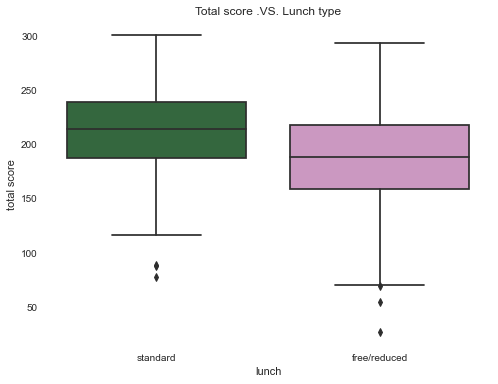

In [317]:
plt.figure(figsize = [8, 6])
sns.boxplot(data=students,x='lunch', y='total score',palette='cubehelix' )
plt.title("Total score .VS. Lunch type")

In [318]:
stats.ttest_ind(students[students['lunch']=='standard']['total score'], students[students['lunch']=='free/reduced']['total score'])

Ttest_indResult(statistic=9.575113051511472, pvalue=7.73679181249555e-21)

In [320]:
# impact of prepation class on result - chi2
lunch_parents = pd.crosstab(index=students['parental level of education'], columns=students['lunch'])
lunch_parents

lunch                        free/reduced  standard
parental level of education                        
associate's degree                     77       145
bachelor's degree                      44        74
high school                            70       126
master's degree                        24        35
some college                           79       147
some high school                       61       118

In [321]:
stats.chi2_contingency(lunch_result)

(27.080029193113127,
 1.952041740629633e-07,
 1,
 array([[ 36.565, 318.435],
        [ 66.435, 578.565]]))

#### Predicting students scores (WIP)

In [312]:
# splitting the dependent and independent variables

x = students.iloc[:,:5]
y = students.iloc[:,9]

print(x.shape)
print(y.shape)

(1000, 5)
(1000,)


In [313]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 5)
(750,)
(250, 5)
(250,)
